In [1]:
import numpy as np
import matplotlib.pyplot as plt

from lammps import Lammps

# Run a Sample Lammps Calculation

We will show how to run a calculation from:
  - a filename
  - command by command

In [2]:
Lammps?

Init signature: Lammps(self, /, *args, **kwargs)
Docstring:     
LAMMPS base class represents the entire library.

Parameters
----------
units : :obj:`str`
    units to use for simulation default lj
style : :obj:`str`
    atomic style to use for simulation. default atomic
comm : :obj:`mpi4py.Comm`
    default value is MPI_COMM_WORLD
args : :obj:`list[str]`
    command line args that would be supplied to normal lammps executable

Possible values for the following arguments:
 * args: `command-line arguments <http://lammps.sandia.gov/doc/Section_start.html#command-line-options>`_
 * units: `units <http://lammps.sandia.gov/doc/units.html>`_
 * style: `atom_style <http://lammps.sandia.gov/doc/atom_style.html>`_
File:           ~/.virtualenvs/lammps-cython-mqB2lalk/lib/python3.6/site-packages/lammps_cython-0.3.6-py3.6-linux-x86_64.egg/lammps/core.cpython-36m-x86_64-linux-gnu.so
Type:           type


In [3]:
lmp = Lammps()
print(lmp.__version__)

16 Mar 2018


In [4]:
print(lmp.check_error())

None


In [5]:
lmp

<Lammps Style:atomic Atoms:0 Lattice:[1.0, 1.0, 1.0]>

In [6]:
lmp.command('atom_modify map yes') # needed for scatter properties

'atom_modify'

In [7]:
%%file melt.in

units         lj
atom_style    atomic

lattice       fcc 0.8442
region        box block 0 10 0 10 0 10
create_box    1 box
create_atoms  1 box
mass          1 1.0

velocity      all create 3.0 87287

pair_style    lj/cut 2.5
pair_coeff    1 1 1.0 1.0 2.5

neighbor      0.3 bin
neigh_modify  every 20 delay 0 check no

fix           1 all nve
thermo        50
run           250

Overwriting melt.in


In [8]:
# run by filename
lmp.file('melt.in')

In [9]:
# run by command
lmp.command('run 100')

'run'

In [10]:
print('are there errors?', lmp.check_error())

are there errors? None


In [11]:
# run invalid command and check for error
lmp.command('adsfasdf')

LammpsNormalError: ERROR: Unknown command: adsfasdf (../input.cpp:314)


# Get basic lammps information

In [12]:
print('what timestep are we on?', lmp.time_step)
print('what is the dt?', lmp.dt)
print('what is the total time elapsed?', lmp.time)
print('what are the units', lmp.units)

what timestep are we on? 350
what is the dt? 0.005
what is the total time elapsed? 1.75
what are the units lj


# Get Unitcell Information

In [13]:
print('calculation dimension', lmp.box.dimension)
print('Lammps Box Units')
print('lo, hi', lmp.box.lohi)
print('tilts', lmp.box.tilts)

print('More Convenient Units')
print('lengths angles\n', lmp.box.lengths)
print('lengths angles\n', lmp.box.angles)
print('lengths angles\n', lmp.box.lengths_angles)

print('unit cell volume', lmp.box.volume)

calculation dimension 3
Lammps Box Units
lo, hi [[ 0.          0.          0.        ]
 [16.79596191 16.79596191 16.79596191]]
tilts [0. 0. 0.]
More Convenient Units
lengths angles
 (16.795961913825074, 16.795961913825074, 16.795961913825074)
lengths angles
 (1.5707963267948966, 1.5707963267948966, 1.5707963267948966)
lengths angles
 ((16.795961913825074, 16.795961913825074, 16.795961913825074), (1.5707963267948966, 1.5707963267948966, 1.5707963267948966))
unit cell volume 4738.213693437576


# Set box lengths and angles

note that when you change the lattice constant the atom positions do not update.

In [14]:
# lmp.box.update_lattice_const([1, 1, 1])

In [15]:
# lmp.box.lengths_angles

# Get Global System Positions, Velocities, Forces...

Supported properties:
    
``` python
    ATOM_STYLE_PROPERTIES = {
        'mass': (np.float, 1), # mass of particle (mass units)
        'id': (np.int_, 1), # integer ID of atom
        'type': (np.int, 1), # type of atom (1-Ntype)
        'mask': (np.int, 1),
        'image': (np.int, 1),
        'x': (np.float, 3), # atom position (position units)
        'v': (np.float, 3), # atom velocity (velocity units)
        'f': (np.float, 3), # atom force (force units)
        'molecule': (np.int, 1), # integer ID of molecule the atom belongs to
        'q': (np.float, 1), # charge on atom (charge units)
        'mu': (np.float, 3), # x,y,z components of dipole moment of atom (dipole units)
        'omega': (np.float, 3),
        'angmom': (np.float, 3),
        'torque': (np.float, 3),
        'radius': (np.float, 1),
        'rmass': (np.float, 1),
        'ellipsoid': (np.float, 1),
        'line': (np.float, 1),
        'tri': (np.float, 1),
        # Peri Package
        'vfrac': (np.float, 3),
        's0': (np.float, 1),
        'x0': (np.float, 3),
        # USER-EFF & USER-AWPMD
        'spin': (np.int, 1),
        'eradius': (np.float, 1), # electron radius (or fixed-core radius)
        'ervel': (np.float, 1),
        'erforce': (np.float, 1),
        'ervelforce': (np.float, 1),
        'cs': (np.float, 1),
        'csforce': (np.float, 1),
        'vforce': (np.float, 1),
        'etag': (np.int),
        # USER-SPH
        'rho': (np.float, 1), # density (need units) for SPH particles
        'drho': (np.float, 1),
        'e': (np.float, 1),
        'de': (np.float, 1),
        'cv': (np.float, 1),
        'vest': (np.float, 3),
        # USER-SMD
        'contact_radius': (np.float, 1),
        'smd_data_9': (np.float, 3),
        'smd_stress': (np.float, 3),
        'eff_plastic_strain': (np.float, 1),
        'eff_plastic_strain_rate': (np.float, 1),
        'damage': (np.float, 1),
        # USER-DPD
        'dpdTheta': (np.float, 1),
        # USER-MESO
        'edpd_temp': (np.float, 1)
    }
```

In [16]:
print('total number of atoms', lmp.system.total)
print('lammps atom style', lmp.system.style)
print('lammps local number of atoms', lmp.system.local_total)
print('lammps atom id', lmp.system.tags)
print('lammps types', lmp.system.types)
print('lammps charges', lmp.system.charges)

total number of atoms 4000
lammps atom style atomic
lammps local number of atoms 4000
lammps atom id [[   1]
 [   2]
 [   3]
 ...
 [3998]
 [3999]
 [4000]]
lammps types [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
lammps charges [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [17]:
# you can access any atom property stated above via
# there are shorthands for several properties (position, velocity, forces)
# x, v, f, ...
data = lmp.system.global_gather_property_ordered('v')
print(data.shape)
print(data.dtype)
print(data)

(4000, 3)
float64
[[ 0.17106932 -0.01271931 -1.322505  ]
 [-0.67515086 -0.23493671 -1.36563717]
 [ 0.24930222  0.01960064  1.37036168]
 ...
 [ 1.15490059  0.8271506   0.74155785]
 [ 1.08779623 -1.70421965 -0.80432748]
 [-0.66556232  0.04712233  0.80157181]]


In [18]:
%%timeit
# it is very quick to get system information
lmp.system.global_gather_property_ordered('x')

38.1 µs ± 540 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [19]:
print('are there errors?', lmp.check_error())

are there errors? None


# Set Global System Positions, Velocities, Forces...

you do not want to set the position this way. This is becuase it most likely will change the processor that the atom is located in. use `create_atoms` instead.

In [20]:
print('original velocities', lmp.system.global_gather_property_ordered('v'))

original velocities [[ 0.17106932 -0.01271931 -1.322505  ]
 [-0.67515086 -0.23493671 -1.36563717]
 [ 0.24930222  0.01960064  1.37036168]
 ...
 [ 1.15490059  0.8271506   0.74155785]
 [ 1.08779623 -1.70421965 -0.80432748]
 [-0.66556232  0.04712233  0.80157181]]


In [21]:
data = np.random.random((lmp.system.total, 3)).astype(np.float64) * 0.01
print('data being set', data)
lmp.system.global_scatter_property_ordered('v', data)

data being set [[0.0046945  0.00095293 0.00620365]
 [0.00725084 0.00730999 0.00317498]
 [0.00849543 0.00303979 0.00359003]
 ...
 [0.00292327 0.00498436 0.00093266]
 [0.00975469 0.00766141 0.00736565]
 [0.00109815 0.00015889 0.00257475]]


In [22]:
print('are there errors?', lmp.check_error())

are there errors? None


In [23]:
print('new velocities', lmp.system.global_gather_property_ordered('v'))

new velocities [[0.0046945  0.00095293 0.00620365]
 [0.00725084 0.00730999 0.00317498]
 [0.00849543 0.00303979 0.00359003]
 ...
 [0.00292327 0.00498436 0.00093266]
 [0.00975469 0.00766141 0.00736565]
 [0.00109815 0.00015889 0.00257475]]


In [24]:
%%timeit
# to prove that the simulation is stable lets time the amount of time to do 100 timesteps
lmp.run(100)

320 ms ± 3.66 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Lammps Movie of Simulation

200 time steps. takes about 20 seconds to create. This shows off plotting and how you can do on the fly analysis. There is much more that is possible.

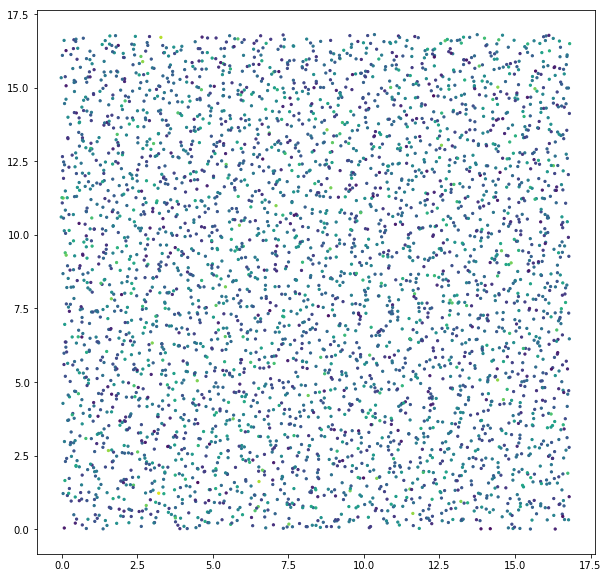

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML

c = np.linalg.norm(lmp.system.velocities, axis=1)
c_min = np.min(c)
c_max = np.max(c)

def main():
    numframes = 100

    fig = plt.figure()
    fig.set_size_inches((10, 10))
    x = lmp.system.positions[:, 0].reshape(-1, 1)
    y = lmp.system.positions[:, 0].reshape(-1, 1)
    c = np.linalg.norm(lmp.system.velocities, axis=1).reshape(-1, 1)
    c_norm = (np.clip(c, c_min, c_max) - c_min) / (c_max - c_min)
    scat = plt.scatter(x, y, c=c_norm, s=5)

    ani = animation.FuncAnimation(fig, update_plot, frames=range(numframes),
                                  fargs=(scat,))
    return HTML(ani.to_html5_video())

def update_plot(i, scat):
    lmp.run(3)
    x = lmp.system.positions[:, 0].reshape(-1, 1)
    y = lmp.system.positions[:, 1].reshape(-1, 1)
    c = np.linalg.norm(lmp.system.velocities, axis=1)
    c_norm = (np.clip(c, c_min, c_max) - c_min) / (c_max - c_min)
    diff = np.concatenate((x, y), axis=1)
    scat.set_array(c_norm)
    scat.set_offsets(diff)
    return scat,

main()

# Thermostats

You can read and set thermostats

In [26]:
# list all set thermostats
lmp.thermo.computes

{'thermo_temp': <Compute:temp id:thermo_temp>,
 'thermo_press': <Compute:pressure id:thermo_press>,
 'thermo_pe': <Compute:pe id:thermo_pe>}

In [27]:
# Lets inspect their values
# lmp.thermo.pressure is shorthand for default 'thermo_press'

# Pressures
print(lmp.thermo.pressure.name)
print(lmp.thermo.computes['thermo_press'].scalar)
print(lmp.thermo.computes['thermo_press'].vector)

# Temperature
print(lmp.thermo.temperature.name)
print(lmp.thermo.computes['thermo_temp'].scalar)
print(lmp.thermo.computes['thermo_temp'].vector)

# Potential Energy
print(lmp.thermo.potential_energy.name)
print(lmp.thermo.computes['thermo_pe'].scalar)
# intentionally fail (notice that some computes do not have vector or scalar properties)
print(lmp.thermo.computes['thermo_pe'].vector)  

thermo_press
0.3529518496992252
[ 0.34106014  0.33626145  0.38153396 -0.01908096 -0.02366363 -0.02221657]
thermo_temp
0.6471006552335818
[ 2.62394213e+03  2.63520858e+03  2.50411585e+03 -8.91451526e+01
 -1.83659485e+01  2.34021944e+00]
thermo_pe
-22935.869218133612


NotImplementedError: Style pe does not have a vector function

## Create my own compute

In [28]:
lmp.thermo.add?

Docstring:
Thermo.add(self, str id, str style, str group='all', args=None)
Add a compute to LAMMPS

       Parameters
       ----------
       id : str
          name of new LAMMPS compute must be unique
       style : str
          name of compute to add
       group : str
          name of compute group. default 'all'.
       args : list[str]
          additional args to supply to compute

       Equivalent lammps command: ``compute ID group-ID style args``

       See `compute <http://lammps.sandia.gov/doc/compute.html>`_ for
       more information on creating computes.
       
Type:      builtin_function_or_method


In [29]:
lmp.thermo.add('my_ke', 'ke', 'all')

In [30]:
lmp.thermo.computes

{'thermo_temp': <Compute:temp id:thermo_temp>,
 'thermo_press': <Compute:pressure id:thermo_press>,
 'thermo_pe': <Compute:pe id:thermo_pe>,
 'my_ke': <Compute:ke id:my_ke>}

In [31]:
# notice thermo property has not been computed!
lmp.thermo.computes['my_ke'].scalar

51612.793039501434

In [32]:
# doing this to force thermo computes
lmp.command('run 1')


'run'

In [33]:
lmp.thermo.computes['my_ke'].scalar

3888.26907655637

# Lets check this by calculating the kinetic energy ourselves

In [34]:
masses = np.zeros(len(lmp.system.atom_types))
for atom_type in lmp.system.atom_types:
    # index starts at 1 in lammps
    masses[atom_type.index-1] = atom_type.mass
print(masses)

[1.]


In [35]:
# shift atom type index by 1
# \sum 1/2 m * v^2
mass = masses[lmp.system.types-1].ravel() # get shapes to agree
np.sum(0.5 * mass * np.power(np.linalg.norm(lmp.system.velocities, axis=1), 2))

3888.2690765563657

# Add atoms to system

In [36]:
lmp.system.velocities

array([[-0.63961119,  0.43480368,  0.52989446],
       [-1.22647558,  0.43373406, -0.46288612],
       [ 0.24856921,  0.6069137 ,  0.41351333],
       ...,
       [ 0.46505359, -0.81179766,  0.3688048 ],
       [-0.97323576, -1.17248137,  0.07388822],
       [ 1.20621552, -0.08851838,  1.27401695]])

In [37]:
print('total number atoms before', lmp.system.total)
print('total velocities', lmp.system.velocities)

N = 5
positions = np.random.random((N, 3))
velocities = np.random.random((N, 3))
types = np.full((N,), 1, dtype=np.intc)
print(positions.shape, velocities.shape, types.shape)
print(types)

lmp.system.create_atoms(types, positions, velocities)

print('total number of atoms after', lmp.system.total)

total number atoms before 4000
total velocities [[-0.63961119  0.43480368  0.52989446]
 [-1.22647558  0.43373406 -0.46288612]
 [ 0.24856921  0.6069137   0.41351333]
 ...
 [ 0.46505359 -0.81179766  0.3688048 ]
 [-0.97323576 -1.17248137  0.07388822]
 [ 1.20621552 -0.08851838  1.27401695]]
(5, 3) (5, 3) (5,)
[1 1 1 1 1]
total number of atoms after 4005


In [38]:
# for some reason there is not error...
lmp.check_error()

In [39]:
print('ids', lmp.system.tags)
print('types', lmp.system.types)
print('positions', lmp.system.positions)
print('velocities', lmp.system.velocities)

ids [[   1]
 [   2]
 [   3]
 ...
 [4003]
 [4004]
 [4005]]
types [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
positions [[ 1.08640723  0.26635314 16.3674489 ]
 [16.63302002  0.32771734  1.07581695]
 [ 1.17226701  0.37045245  0.69146471]
 ...
 [ 0.34556222  0.8147785   0.90436418]
 [ 0.88749149  0.92076168  0.69883294]
 [ 0.60195324  0.13471174  0.33653202]]
velocities [[-0.63961119  0.43480368  0.52989446]
 [-1.22647558  0.43373406 -0.46288612]
 [ 0.24856921  0.6069137   0.41351333]
 ...
 [ 0.06125374  0.60269232  0.60566849]
 [ 0.09215173  0.94571305  0.53867203]
 [ 0.11940837  0.98342452  0.77462917]]
